# Laboratory Practice 4 - Introduction to Statistical Analysis

- *Introduction to Statistical Computing*
- Author: Elena Conderana & Sergio Cuenca
- Date: 17/02/2025

This lab is to be done outside of class time. You may collaborate with one classmate, but you must identify yourself and his/her name above, in the author's field, and you must submit **your own** lab as this completed *.ipynb* file. 

Remember to always maintain good programming style by using clear variable names, commenting the code, creating useful, well-formatted graphs with appropriate titles and labels...

The sections of this notebook are listed below: 

1. [Introduction](#introduction)
2. [Data](#data)
3. [Analysing departure delays and filtering](#delays)
4. [Departure delays over months](#delaysmonths)
5. [On time departure rate for NYC airports](#airports)

----------------------

## 1. Introduction <a id="introduction"></a>

Some define statistics as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information - the data. In this lab we explore flights, specifically a random sample of domestic flights that departed from the three major New York City airport in 2013. We will generate simple graphical and numerical summaries of data on these flights and explore delay times (Exploratory Data Analysis, EDA). As this is a large data set, along the way you'll also learn the indispensable skills of data processing and subsetting.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Data <a id="data"></a>

The [Bureau of Transportation Statistics](http://www.rita.dot.gov/bts/about/) (BTS) is a statistical agency that is a part of the Research and Innovative 
Technology Administration (RITA). As its name implies, BTS collects and makes available transportation data, such as the flights data we will be working with in this lab.

We begin by loading the `nycflights` data frame:

In [3]:
df_flight = pd.read_csv('flight_data.csv')
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


The data frame containing `nycflights` is a dataframe, where each row represents an observation and each column represents a variable. In Python, this structure is called a pandas DataFrame, a term that will be used throughout the labs. 

You can check the dimensions of the dataframe by using the following functions: 

In [3]:
print("Shape = {}".format(df_flight.shape))
print("Size = {}".format(df_flight.size))

Shape = (336776, 19)
Size = 6398744


In [4]:
# And complete this cell: 
print(f"The data frame contains {df_flight.shape[0]} flights and {df_flight.shape[1]} variables to describe them")

The data frame contains 336776 flights and 19 variables to describe them


You can also view the names of the variables. To do so, complete the following cell: 

In [5]:
print("Variable names = {}".format(df_flight.columns))

Variable names = Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')


The **codebook** (description of the variables) is included below:
- `year`, `month`, `day`: Date of departure.
- `dep_time`, `arr_time`: Departure and arrival times, local timezone.
- `sched_dep_time`, `sched_arr_time`: Schedules departure and arrival times, local timezone.
- `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- `carrier`: Two letter carrier abbreviation.
    + `9E`:           Endeavor Air Inc.
    + `AA`:      American Airlines Inc.
    + `AS`:        Alaska Airlines Inc.
    + `B6`:             JetBlue Airways
    + `DL`:        Delta Air Lines Inc.
    + `EV`:    ExpressJet Airlines Inc.
    + `F9`:      Frontier Airlines Inc.
    + `FL`: AirTran Airways Corporation
    + `HA`:      Hawaiian Airlines Inc.
    + `MQ`:                   Envoy Air
    + `OO`:       SkyWest Airlines Inc.
    + `UA`:       United Air Lines Inc.
    + `US`:             US Airways Inc.
    + `VX`:              Virgin America
    + `WN`:      Southwest Airlines Co.
    + `YV`:          Mesa Airlines Inc.
- `tailnum`: Plane tail number
- `flight`: Flight number
- `origin`, `dest`: Airport codes for origin and destination. (Google can help
you with what code stands for which airport.)
- `air_time`: Amount of time spent in the air, in minutes.
- `distance`: Distance flown, in miles.
- `hour`, `minute`: Time of departure broken in to hour and minutes.
- `time_hour`: combination of the date and hour.  

Use the functions `.describe()` and `.info()` to get a a summary of the values in the dataset as well as to check the types and non-null count of each column.

In [6]:
df_flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [37]:
df_flight = df_flight.dropna()

As you can see, there is a variable whose data type is not well defined. Convert it to the right type and check it by using the function `dtypes`. 

In [9]:
df_flight['time_hour'] = df_flight['time_hour'].apply(pd.to_datetime)
df_flight.dtypes

C:\Users\Elena\AppData\Local\Temp\ipykernel_20924\1323447379.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_flight['time_hour'] = df_flight['time_hour'].apply(pd.to_datetime)


year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
dtype: object

The `nycflights` data frame is a massive trove of information. Let's think about some questions we might want to answer with these data:

- We might want to find out how delayed flights headed to a particular destination tend to be. 
- We might want to evaluate how departure delays vary over months. 
- Or we might want to determine which of the three major NYC airports has a better on time percentage for departing flights.

Before moving on, let's see some of the many useful functions for basic manipulation that the `pandas` library has, including: 
1. Data Selection & Filtering:
    - df.loc[]: Selects rows and columns by label.
    - df.iloc[]: Selects rows and columns by index position.
    - df.query(): Allows for SQL-like queries.
    - df.isnull() / df.notnull(): Checks for missing values.
    - df.where(): Conditional replacement of values.
2. Sorting:
    - df.sort_values(): Sorts data by column(s) (as seen in arrange()).
    - df.sort_index(): Sorts by row index.
3. Handling Duplicates:
    - df.duplicated(): Returns a boolean Series indicating duplicate rows.
    - df.drop_duplicates(): Removes duplicate rows.
4. Column/Row Operations:
    - df.apply(): Apply a function along an axis (rows or columns).
    - df.applymap(): Apply a function elementwise (for DataFrames).
    - df.map(): Apply a function elementwise to a Series.
    - df.assign(): Adds new columns to a DataFrame.
    - df.insert(): Adds a new column at a specific position.
5. Aggregation:
    - df.groupby(): Groups the data by one or more columns for aggregation.
    - df.aggregate(): Applies multiple aggregation functions to a DataFrame or Series.
    - df.pivot_table(): Creates a pivot table.
6. Joining & Merging:
    - df.merge(): Merges DataFrames similar to SQL joins.
    - df.concat(): Concatenates DataFrames along rows or columns.
    - df.join(): Joins DataFrames based on index or columns.
7. Reshaping & Pivoting:
    - df.melt(): Unpivots columns to rows (wide to long format).
    - df.pivot(): Reshapes data from long to wide format.
    - df.stack(): Stacks columns into a Series.
    - df.unstack(): Unstacks a MultiIndex Series or DataFrame.

And many more...

We will use some of these functions in this lab, and learn about others in futures labs.

## 3. Analysing departure delays and filtering <a id="delays"></a>

### 3.1 Departure delays 

a) Histograms are generally a very good way to see the shape of a single distribution, but that shape can change depending on how the data is split between the different bins. You can easily define the bin width you want to use. Therefore, create a subplot with two histograms of the departure delay, one of them with 15 bins and the other one with 150. 

Text(0, 0.5, 'Frequency')

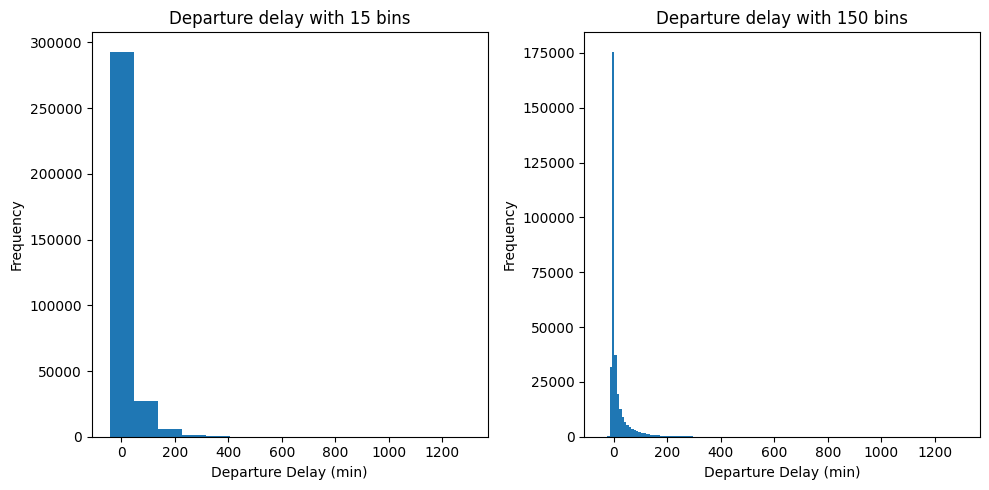

In [10]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

axs[0].hist(df_flight['dep_delay'], bins=15)
axs[0].set_title('Departure delay with 15 bins')
axs[0].set_xlabel('Departure Delay (min)') 
axs[0].set_ylabel('Frequency') 

axs[1].hist(df_flight['dep_delay'], bins=150) 
axs[1].set_title('Departure delay with 150 bins')
axs[1].set_xlabel('Departure Delay (min)') 
axs[1].set_ylabel('Frequency')

b) Do you know the **Sturges Rule** for determining the number of bins? Calculate the value for this dataset and explain whether you think it would be a good number to use in this case, or, on the contrary, why you think it wouldn't work for this dataset.

In [11]:
n = df_flight['dep_delay'].size
Sturges_bins = int(1 + np.log2(n))

print(f"Sturges' number of bins: {Sturges_bins}")

Sturges' number of bins: 19


**Explanation:** Given the big amount of different departure delays 19 bins would not quite be able to capture all the information. As can be seen in the previous histograms with more bins the distribution is clearer to picture. 

### 3.2 Flights with destination RDU

a) We want to focus on departure delays of flights headed to RDU only. To do so, filter the original dataset and show its first three rows.

In [12]:
RDU_dep_delays = df_flight[df_flight['dest'] == "RDU"]
RDU_dep_delays.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
106,2013,1,1,800.0,810,-10.0,949.0,955,-6.0,MQ,4406,N828MQ,JFK,RDU,80.0,427,8,10,2013-01-01 08:00:00
144,2013,1,1,832.0,840,-8.0,1006.0,1030,-24.0,MQ,4521,N725MQ,LGA,RDU,77.0,431,8,40,2013-01-01 08:00:00
153,2013,1,1,851.0,851,0.0,1032.0,1036,-4.0,EV,4548,N19966,EWR,RDU,75.0,416,8,51,2013-01-01 08:00:00


**Logical operators:** Filtering for certain observations (e.g. flights from a particular airport) is often of interest in data frames where we might want to examine observations with certain characteristics separately from the rest of the data. To do so we use the `filter` function and a series of logical operators. The most commonly used logical operators for data analysis are as follows:
- `==` means "equal to".
- `!=` means "not equal to".
- `>` or `<` means "greater than" or "less than".
- `>=` or `<=` means "greater than or equal to" or "less than or equal to".

Additionally, many conditions can be combined using:
- `&` (and) to ensure all conditions are true.
- `|` (or) to ensure at least one condition is true.

b) Plot an histogram of the departure delays.

Text(0, 0.5, 'Frequency')

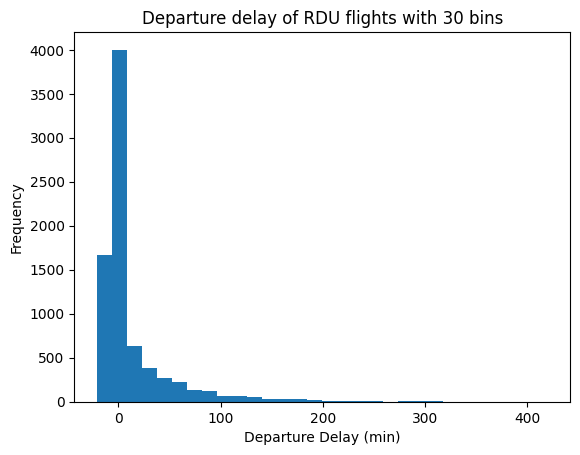

In [13]:
plt.hist(RDU_dep_delays['dep_delay'], bins=30)
plt.title('Departure delay of RDU flights with 30 bins')
plt.xlabel('Departure Delay (min)') 
plt.ylabel('Frequency')

c) What percentage of the flights match the above condition? Round the value to two decimal places.

In [14]:
RDU_dest_percentage = RDU_dep_delays.shape[0]/df_flight.shape[0] * 100
print(f"% of flights with RDU destination: {round(RDU_dest_percentage,2)}%")

% of flights with RDU destination: 2.37%


d) Answer the questions by obtaining the exact values using pandas functions:
- What is the maximum delay of a flight headed to RDU in minutes?
- Where did it depart from?

In [15]:
RDU_max_delay = RDU_dep_delays.sort_values('arr_delay', ascending=False).iloc[0]
print(f"The maximum delay of a flight headed to RDU in minutes is: {RDU_max_delay['arr_delay']}")

The maximum delay of a flight headed to RDU in minutes is: 430.0


In [16]:
print(f"It departed from: {RDU_max_delay['origin']}")

It departed from: JFK


e) Calculate the summary statistics (mean, median, maximum value, minimum value, standard deviation, and sample size) for the RDU flights' departure delays.

In [17]:
delay_stats = RDU_dep_delays['dep_delay'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])
print(f"Summary Statistics for RDU Flights' Departure Delays:{delay_stats}")

Summary Statistics for RDU Flights' Departure Delays:mean        12.398842
median      -2.000000
max        420.000000
min        -21.000000
std         38.920590
count     7770.000000
Name: dep_delay, dtype: float64


### 3.3. Flights headed to San Francisco in February

a) Filter the flights with San Francisco as the destination and that were done in February.

In [18]:
SFO_dest_Feb = df_flight[(df_flight['dest'] == "SFO") & (df_flight['month']==2)]
SFO_dest_Feb.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
111316,2013,2,1,559.0,600,-1.0,923.0,925,-2.0,UA,303,N508UA,JFK,SFO,358.0,2586,6,0,2013-01-02 06:00:00
111348,2013,2,1,631.0,635,-4.0,946.0,1002,-16.0,UA,421,N818UA,EWR,SFO,352.0,2565,6,35,2013-01-02 06:00:00
111370,2013,2,1,653.0,700,-7.0,1023.0,1045,-22.0,DL,1865,N713TW,JFK,SFO,349.0,2586,7,0,2013-01-02 07:00:00


b) Focusing on the arrival delay, which of the following sentences is/are false? 
- The distribution is unimodal.
- The distribution is right skewed.
- No flight is delayed more than 3 hours and 20 minutes.
- The distribution has several extreme values on the right side.
- More than 50% of flights arrive on time or earlier than scheduled.

Hint: you may need to get statistics and plot an histogram like in previous steps.

Text(0, 0.5, 'Frequency')

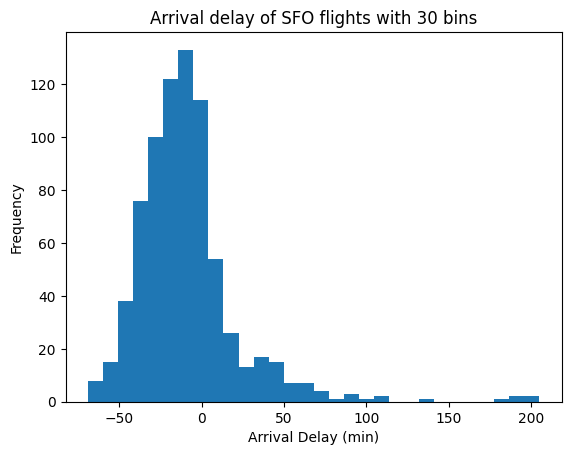

In [19]:
plt.hist(SFO_dest_Feb['arr_delay'], bins=30)
plt.title('Arrival delay of SFO flights with 30 bins')
plt.xlabel('Arrival Delay (min)') 
plt.ylabel('Frequency')

In [20]:
arr_stats = SFO_dest_Feb['arr_delay'].agg(['mean', 'median', 'max', 'min', 'std', 'count'])
print(f"Summary Statistics for SFO Flights' Arrival Delays:{arr_stats}")

Summary Statistics for SFO Flights' Arrival Delays:mean       -9.143045
median    -13.000000
max       205.000000
min       -69.000000
std        31.409202
count     762.000000
Name: arr_delay, dtype: float64


**Answer:** 
- The distribution is unimodal. - True (Solo una punta en el histograma)
- The distribution is right skewed. - True (Cola derecha en histograma)
- No flight is delayed more than 3 hours and 20 minutes. - False (Máx son 3h 25')
- The distribution has several extreme values on the right side. - True (Se observa en histograma)
- More than 50% of flights arrive on time or earlier than scheduled. - True (Mediana está en -13)

Another useful functionality is being able to quickly calculate summary statistics for various groups in your data frame. To do so, you can use the `groupby` function.

c) Calculate the median and interquartile range for `arr_delay` of the dataframe filterede above with flights headed to SFO in February, grouped by carrier. 

Which carrier has the hights IQR of arrival delays?
- American Airlines.
- JetBlue Airways.
- Virgin America.
- Delta and United Airlines.
- Frontier Airlines.

In [21]:
print(f"Median Arrival Delay (grouped by carrier): {SFO_dest_Feb.groupby('carrier')['arr_delay'].median()}")
iqr_arr_delay = SFO_dest_Feb.groupby('carrier')['arr_delay'].quantile(0.75) - SFO_dest_Feb.groupby('carrier')['arr_delay'].quantile(0.25)
print(f"\nInterquartile Range of Arrival Delay (grouped by carrier):{iqr_arr_delay}")

Median Arrival Delay (grouped by carrier): carrier
AA    -7.0
B6   -11.0
DL   -24.0
UA    -9.0
VX   -20.0
Name: arr_delay, dtype: float64

Interquartile Range of Arrival Delay (grouped by carrier):carrier
AA    35.0
B6    25.5
DL    27.5
UA    27.0
VX    23.0
Name: arr_delay, dtype: float64


**Answer:** American Airlines has the highest IQR of arrival delays (35).

d) Draw a line plot showing the number of flights by day (using the previous dataframe: SFO in February). Do you see any pattern? Why do you think this is, and what is your reasoning for the peaks?

Hint: you may need to keep using the `groupby` function.

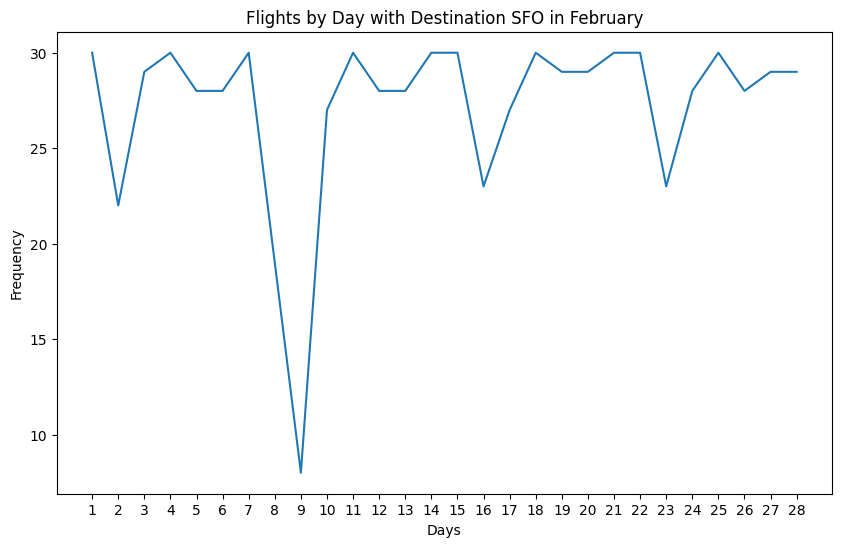

In [22]:
plt.plot(SFO_dest_Feb.groupby('day').count()['year'])
plt.title('Flights by Day with Destination SFO in February')
plt.xlabel('Days') 
plt.ylabel('Frequency')
plt.xticks(SFO_dest_Feb['day'].unique()) 
plt.gcf().set_size_inches(10, 6)

**Answer:** Los picos se repiten de manera cíclica cada 7 días lo cual probablemente corresponde a findes de semana, donde la gente tiende a viajar más. 

## 4. Departure delays over months <a id="delaysmonths"></a>

a) Which month would you expect to have the highest average delay departing from an NYC airport?

Let's think about how we would answer this question:
- First, calculate monthly averages for departure delays. With the new language we are learning, we need to:
    + `group_by` months, then
    + `summarise` mean departure delays.
- Then, we need to `arrange` these average delays in `desc`ending order.

In [23]:
NYC_orig_dep_delay = df_flight[(df_flight['origin'] == "JFK")]
NYC_orig_dep_delay.groupby('month')['dep_delay'].mean().sort_values(ascending=False)


month
7     23.479758
6     20.321934
12    14.650454
8     12.889260
5     12.495038
4     12.214801
2     11.736605
3     10.670843
1      8.557635
9      6.553027
11     4.643378
10     4.577946
Name: dep_delay, dtype: float64

b) Using the file called `months`, replace the column named 'month' in the previous result (which contains numbers) with its corresponding name. To read the dataset, you may use the `sep` argument to specify the file delimiter.

In [24]:
df_months = pd.read_csv('months.csv', sep=';')
month_mapping = dict(zip(df_months['month_number'], df_months['month_name']))
NYC_orig_dep_delay['month'] = NYC_orig_dep_delay['month'].map(month_mapping)
NYC_orig_dep_delay.head(3)

C:\Users\Elena\AppData\Local\Temp\ipykernel_20924\4277110266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_orig_dep_delay['month'] = NYC_orig_dep_delay['month'].map(month_mapping)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,January,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,January,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
8,2013,January,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00


c) Plot a bar chart with the average departure delays by month 

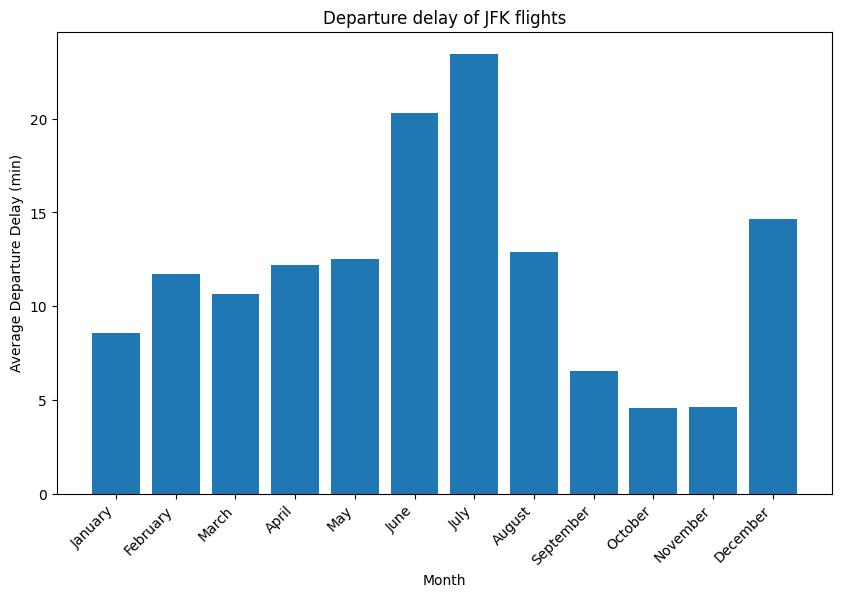

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
NYC_group_delay = NYC_orig_dep_delay.groupby('month')['dep_delay']
plt.bar(NYC_group_delay.mean().reindex(month_order).index,NYC_group_delay.mean().reindex(month_order))
plt.title('Departure delay of JFK flights')
plt.xlabel('Month') 
plt.ylabel('Average Departure Delay (min)')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(10, 6)

d) Which month has the highest median departure delay from an NYC airport?

In [26]:
NYC_group_delay.median().sort_values(ascending=False)-3

month
July        -2.0
December    -3.0
June        -3.0
August      -4.0
February    -4.0
May         -4.0
April       -5.0
January     -5.0
March       -5.0
November    -6.0
October     -6.0
September   -6.0
Name: dep_delay, dtype: float64

e) Is the mean or the median a more reliable measure for deciding which month(s) to avoid flying if you really dislike delayed flights, and why?
- Mean would be more reliable as it gives us the true average.
- Mean would be more reliable as the distribution of delays is symmetric.
- Median would be more reliable as the distribution of delays is skewed.
- Median would be more reliable as the distribution of delays is symmetric.
- Both give us useful information.

**Answer**: Median would be more reliable as the distribution of delays is skewed. Mean is more affected by outliers and skewed distributions, whereas median values are more robust measures of central tendencies.

f) We can also visualize the distributions of departure delays across months using box plots. 
- Which month has a more extreme value/outlier?
- What can be inferred by looking at the box plots across all different months?

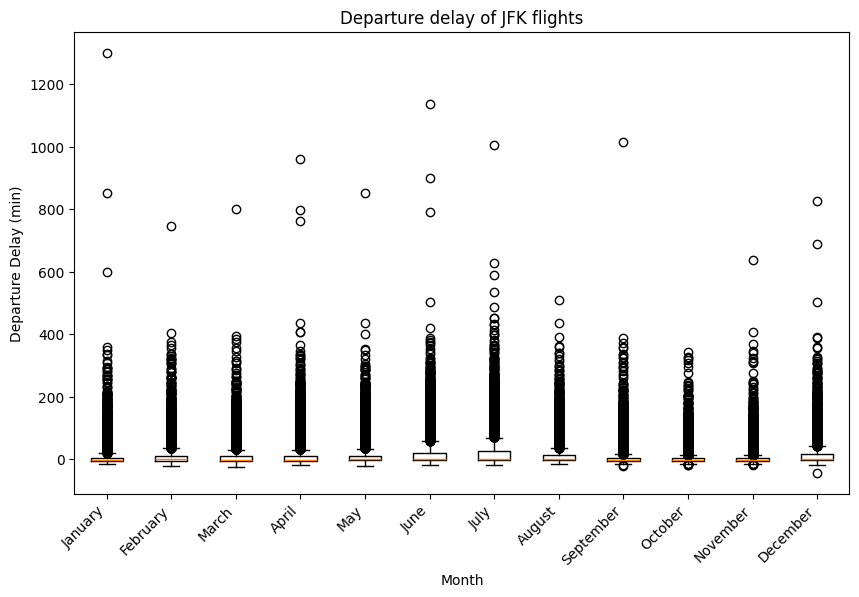

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
boxplot_data = [NYC_group_delay.get_group(month) for month in month_order if month in NYC_group_delay.groups]
plt.boxplot(boxplot_data, labels=month_order)
plt.title('Departure delay of JFK flights')
plt.xlabel('Month') 
plt.ylabel('Departure Delay (min)')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(10, 6)

The most extreme outlier is in January.
The departure delays vary the most in June, July and December, which could be related to summer and winter holidays. 

## 5. On time departure rate for NYC airports <a id="airports"></a>

### 5.1 Delayed vs on time flights

a) Suppose you will be flying out of NYC and want to know which of the three major NYC airports has the best on time departure rate of departing flights. 

Suppose also that for you a flight that is delayed for less than 5 minutes is basically "on time". You consider any flight delayed for 5 minutes of more to be "delayed".

In order to determine which airport has the best on time departure rate, we need to: 

- First classify each flight as "on time" or "delayed". You can use different options like `.apply()` or `where` function. 
- Then group flights by origin airport.
- Then calculate on time departure rates for each origin airport.
- And finally arrange the airports in descending order for on time departure percentage.

In [6]:
def classify_delay_apply(delay):
        if delay < 5:
            return 'on time'
        else:
            return 'delayed'
df_flight['departure_status'] = df_flight['dep_delay'].apply(classify_delay_apply)
df_orig_airport = df_flight.groupby('origin')
on_time_dep_rates = df_orig_airport['departure_status'].apply(lambda x: (x == 'on time').mean())
on_time_dep_rates = on_time_dep_rates.sort_values(ascending=False)
on_time_dep_rates

origin
LGA    0.706006
JFK    0.679257
EWR    0.621922
Name: departure_status, dtype: float64

If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?
- EWR.
- JFK.
- LGA

**Answer:**  I would choose LGA, because it has the highes on time departure rate.

b) Plot a stacked bar chart to see, for each airport, the total number of flights delayed and on time.

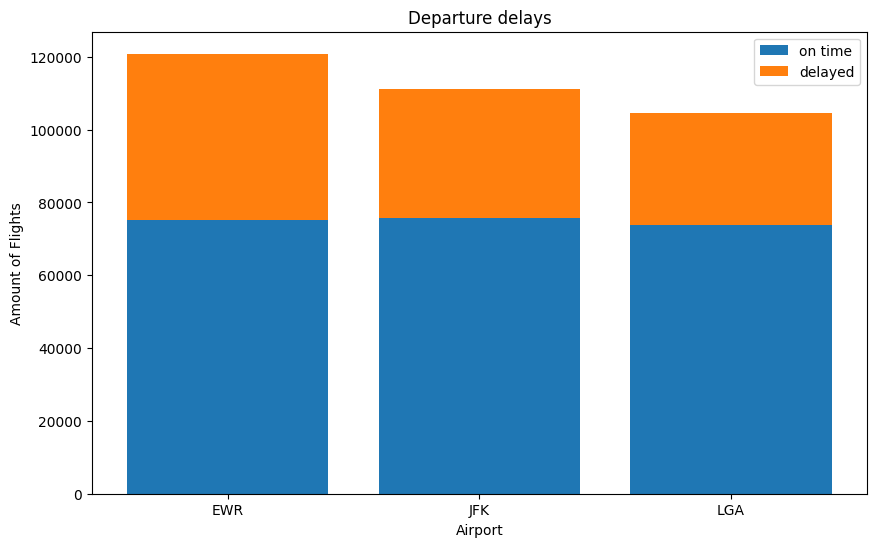

In [72]:
df_dep_ontime_count = df_orig_airport['departure_status'].apply(lambda x: (x == 'on time').sum())
plt.bar(df_dep_ontime_count.index,df_dep_ontime_count, label="on time")
plt.bar(df_dep_ontime_count.index, df_orig_airport['departure_status'].apply(lambda x: (x == 'delayed').sum()), bottom=df_dep_ontime_count, label = "delayed")
plt.title('Departure delays')
plt.xlabel('Airport') 
plt.ylabel('Amount of Flights')
plt.gcf().set_size_inches(10, 6)
plt.legend()

### 5.2 Speed of flights and the fastest plane

a) Create a new variable called `avg_speed` and find the tail number and the average speed of the plane with the fastest average speed. 

*Hint*: Average speed can be calculated as distance divided by number of hours of travel, and note that `air_time` is given in minutes.

In [85]:
avg_speed = df_flight['distance']/df_flight['air_time']
df_flight['avg_speed'] = avg_speed

print(f"The flight with tail number {df_flight.loc[df_flight['avg_speed'].idxmax()]['tailnum']} has the fastest average speed of {df_flight.loc[df_flight['avg_speed'].idxmax()]['avg_speed']} miles per minute.")

The flight with tail number N666DN has the fastest average speed of 11.723076923076922 miles per minute.


You can Google this tail number to find out more about the aircraft. 

b) Make a scatterplot of `avg_speed` vs. `distance` and try to visually identify the flight with the highest average speed. Approximately how many miles did it travel?

Which of the following is true about the relationship between average speed and distance:
- As distance increases the average speed of flights decreases.
- The relationship is linear.
- There is an overall postive association between distance and average speed.
- There are no outliers.
- The distribution of distances are uniform over 0 to 5000 miles.

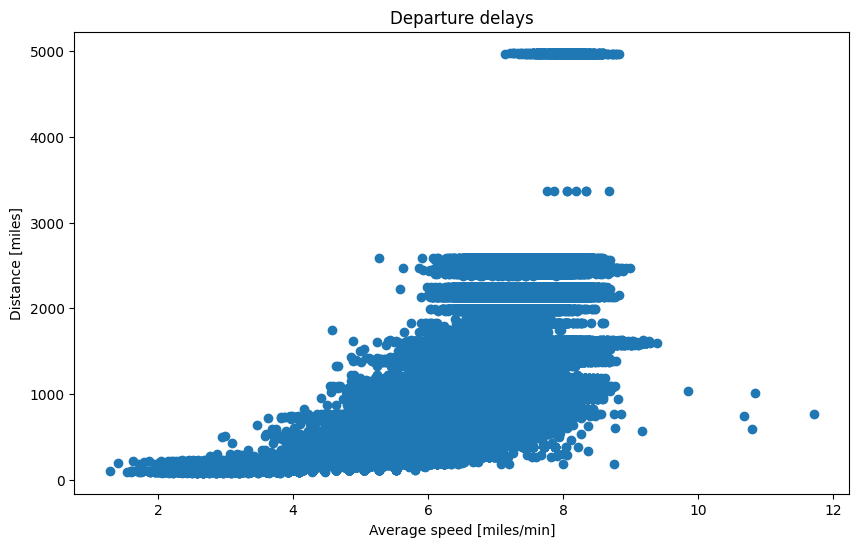

In [88]:
plt.scatter(df_flight['avg_speed'],df_flight['distance'])
plt.title('Departure delays')
plt.xlabel('Average speed [miles/min]') 
plt.ylabel('Distance [miles]')
plt.gcf().set_size_inches(10, 6)

**Answer:** 

c) Suppose you define a flight to be "on time" if it gets to the destination on time or earlier than expected, regardless of any departure delays. Modify the data frame to create a new variable called `arr_type` with levels `"on time"` and `"delayed"` based on this definition. Then, determine the on time arrival percentage based on whether the flight departed on time or not. What proportion of flights that were `"delayed"` departing arrive `"on time"`?

In [4]:
def classify_delay_arr_apply(delay):
        if delay < 1:
            return 'on time'
        else:
            return 'delayed'
df_flight['arr_type'] = df_flight['arr_delay'].apply(classify_delay_arr_apply)

In [33]:
df_dep_arr =df_flight.groupby(['departure_status', 'arr_type'])['year'].count()
delayed_on_time = df_dep_arr.get(('delayed', 'on time'), 0)
delayed_delayed = df_dep_arr.get(('delayed', 'delayed'), 0)

proportion = delayed_on_time / (delayed_on_time + delayed_delayed)
print(f"Proportion of flights that were delayed, but arrived on time were {round(proportion*100,2)}%.")

Proportion of flights that were delayed, but arrived on time were 17.51%.
